In [48]:
import ROOT

In [49]:
df_gg = ROOT.RDataFrame("Events", "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/GluGluToHHTo2B2Tau_node_SM/nanoHTT_0.root")
df_DY = ROOT.RDataFrame("Events", "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/DYJetsToLL_M-50-amcatnloFXFX/nanoHTT_0.root")
df_TT2L2nu = ROOT.RDataFrame("Events", "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTTo2L2Nu/nanoHTT_0.root")
df_TThad = ROOT.RDataFrame("Events", "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTToHadronic/nanoHTT_0.root")
df_TTlep = ROOT.RDataFrame("Events", "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTToSemiLeptonic/nanoHTT_0.root")

In [50]:
print("number of events: gg: ", df_gg.Count().GetValue())
print("number of events: Drell-Yan: ", df_DY.Count().GetValue())
print("number of events: tautau to 2 leptons and 2 nutrinos: ", df_TT2L2nu.Count().GetValue())
print("number of events: hadronic tautau: ", df_TT2L2nu.Count().GetValue())
print("number of events: leptonic tautau: ", df_TT2L2nu.Count().GetValue())

number of events: gg:  5422
number of events: Drell-Yan:  312
number of events: tautau to 2 leptons and 2 nutrinos:  903
number of events: hadronic tautau:  903
number of events: leptonic tautau:  903


In [111]:
def getMHbbHist(file_name, string):
    df = ROOT.RDataFrame("Events", file_name)

    for n in range(1, 3):
        df = df.Define(f"b{n}_p4", f"ROOT::Math::PtEtaPhiMVector(b{n}_pt, b{n}_eta, b{n}_phi, b{n}_mass)")
    df = df.Define("mH_bb", "(b1_p4 + b2_p4).mass()")

    #hist = df.Histo1D(("mH_bb", string, 100, 0, 500), "mH_bb")
    hist = df.Histo1D(("mH_bb", string, 100, 0, 500), "mH_bb", "weight_MC_Lumi_pu")
    
    return hist

def getMHttHist(file_name, string):
    df = ROOT.RDataFrame("Events", file_name)

    for n in range(1, 3):
        df = df.Define(f"tau{n}_p4", f"ROOT::Math::PtEtaPhiMVector(tau{n}_pt, tau{n}_eta, tau{n}_phi, tau{n}_mass)")
    df = df.Define("mH_tautau", "(tau1_p4 + tau2_p4).mass()")

    #hist = df.Histo1D(("mH_tautau", string, 100, 0, 500), "mH_tautau")
    hist = df.Histo1D(("mH_tautau", string, 100, 0, 500), "mH_tautau", "weight_MC_Lumi_pu")
    
    return hist

def getMHHHist(file_name, string):
    df = ROOT.RDataFrame("Events", file_name)
    
    for n in range(1, 3):
        df = df.Define(f"b{n}_p4", f"ROOT::Math::PtEtaPhiMVector(b{n}_pt, b{n}_eta, b{n}_phi, b{n}_mass)")
        df = df.Define(f"tau{n}_p4", f"ROOT::Math::PtEtaPhiMVector(tau{n}_pt, tau{n}_eta, tau{n}_phi, tau{n}_mass)")
        
    df = df.Define("mH_bb", "(b1_p4 + b2_p4).mass()")
    df = df.Define("mH_tautau", "(tau1_p4 + tau2_p4).mass()")
    
    #df = df.Define("mHH", "mH_bb + mH_tautau")
    df = df.Define("mHH", "(b1_p4 + b2_p4).mass() + (tau1_p4 + tau2_p4).mass()")

    hist = df.Histo1D(("mHH", string, 100, 0, 500), "mHH")
    #hist = df.Histo1D(("mH_bb", string, 100, 0, 500), "mH_bb", "weight_MC_Lumi_pu")
    
    return hist

In [112]:
def plotter(canvas, hist, string, higgs_string, color):
    canvas = ROOT.TCanvas("","", 400, 400, 400, 400)

    hist.SetLineColor(color)

    hist.SetLineStyle(1)

    hist.SetLineWidth(2)

    #hist.Scale(1/hist.Integral())

    xAxis = hist.GetXaxis()
    xAxis.SetTitleOffset(0)
    xAxis.SetTitleSize(0.05)
    xAxis.SetTitle("Invariant Mass of {h} from {string} [GeV]".format(h=higgs_string, string=string))

    yAxis = hist.GetYaxis()
    #yAxis.SetRangeUser(0, 1.2*max(hist_gg.GetMaximum(), hist_VBF_C2V_0.GetMaximum(), hist_VBF_C2V_1.GetMaximum()))
    yAxis.SetTitle("events")
    yAxis.SetTitleOffset(1)
    yAxis.SetTitleSize(0.05)

    hist.Draw("HIST")

    canvas.SetGrid()
    canvas.Draw()
    
    return canvas


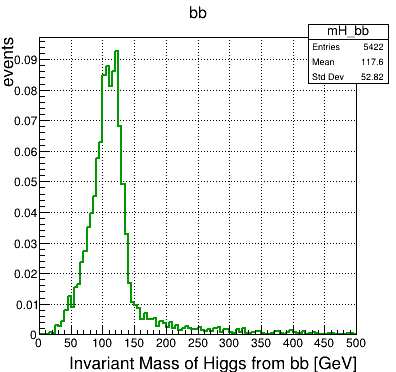

In [113]:
file_gg = "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/GluGluToHHTo2B2Tau_node_SM/nanoHTT_0.root"
hist_bb = getMHbbHist(file_gg, "bb")
canvas = ROOT.TCanvas("","", 400, 400, 400, 400)
plotter(canvas, hist_bb, "bb", "Higgs", ROOT.kGreen+2)

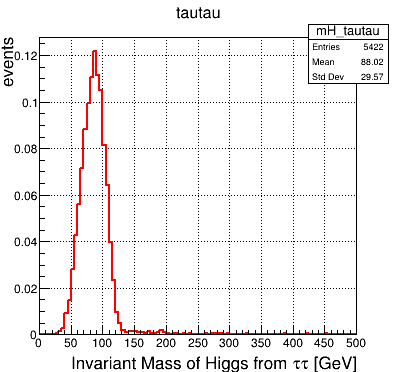

In [114]:
hist_tautau = getMHttHist(file_gg, "tautau")
canvas1 = ROOT.TCanvas("","", 400, 400, 400, 400)
plotter(canvas1, hist_tautau, "#tau#tau", "Higgs", ROOT.kRed)

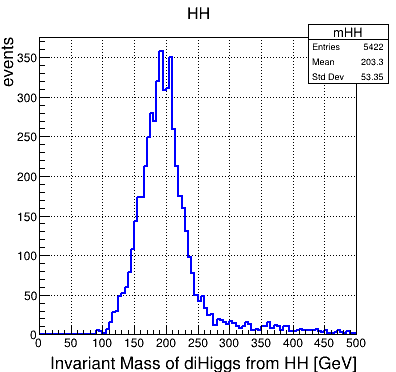

In [110]:
hist_HH = getMHHHist(file_gg, "HH")
canvas2 = ROOT.TCanvas("","", 400, 400, 400, 400)
plotter(canvas2, hist_HH, "HH", "diHiggs", ROOT.kBlue)

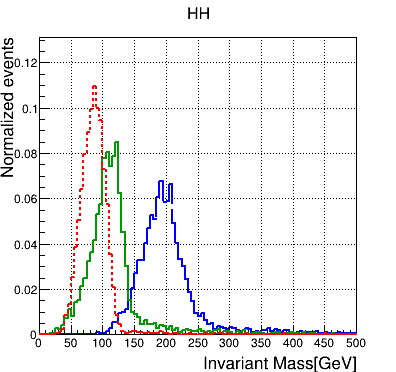

In [127]:
ROOT.gStyle.SetOptStat(0)
canvas3 = ROOT.TCanvas("","", 400, 400, 400, 400)

hist_bb.SetLineColor(ROOT.kGreen+2)
hist_tautau.SetLineColor(ROOT.kRed)
hist_HH.SetLineColor(ROOT.kBlue)

hist_bb.SetLineStyle(1)
hist_tautau.SetLineStyle(2)
hist_HH.SetLineStyle(9)

hist_bb.SetLineWidth(2)
hist_tautau.SetLineWidth(2)
hist_HH.SetLineWidth(2)

hist_bb.Scale(1/hist_bb.Integral())
hist_tautau.Scale(1/hist_tautau.Integral())
hist_HH.Scale(1/hist_HH.Integral())

xAxis = hist_HH.GetXaxis()
xAxis.SetTitleOffset(0)
xAxis.SetTitleSize(0.05)
xAxis.SetTitle("Invariant Mass[GeV]")

yAxis = hist_HH.GetYaxis()
yAxis.SetRangeUser(0, 1.2*max(hist_bb.GetMaximum(), hist_tautau.GetMaximum(), hist_HH.GetMaximum()))
yAxis.SetTitle("Normalized events")
yAxis.SetTitleOffset(1)
yAxis.SetTitleSize(0.05)

hist_HH.Draw("HIST")
hist_bb.Draw("HIST same")
hist_tautau.Draw("HIST same")


#h = ROOT.TH1D("h", "h", 2500, 0, 2500)
#h = hist_gg.clone()

legend = ROOT.TLegend(0.5,0.73,0.9,0.85)
#legend.AddEntry(hist_bb, "bb")
#legend.AddEntry(hist_VBF_C2V_0,"VBF K2V=0")
#legend.AddEntry(hist_VBF_C2V_1,"VBF K2V=1")
legend.SetBorderSize(0)
#legend.Draw()

canvas3.SetGrid()
canvas3.Draw()


In [ ]:
file_DY = "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/DYJetsToLL_M-50-amcatnloFXFX/nanoHTT_0.root"
hist = getMHHist(file_DY, "DY")
file_TT2L2nu = "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTTo2L2Nu/nanoHTT_0.root"
file_TThad = "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTToHadronic/nanoHTT_0.root"
file_TTlep = "/eos/user/t/toakhter/HH_bbtautau_resonant_Run2/anaTuples/v8_deepTau2p1_onlyTauTau_HTT/Run2_2016/TTToSemiLeptonic/nanoHTT_0.root"